In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym, rec_gym
from rec_gym import env_1_args

import numpy as np

In [3]:
env_1_args

{'K': 4,
 'num_items': 100,
 'num_recommendations': 1,
 'num_users': 20,
 'embedding_dimension': 2,
 'cluster_var': 16,
 'in_cluster_var': 0.5,
 'active_user_change_proba': 0.1,
 'noise_sigma': 2,
 'user_init_sigma': 5,
 'user_drifting_kernel': <function rec_gym.envs.prim_env_v1.<lambda>(x)>,
 'user_drift_autoreg_coef': 0.1,
 'user_drift_sigma': 4,
 'user_type': 'drifting',
 'seed': 42}

In [4]:
env = gym.make('prim-gym-v1')
env.init_gym(env_1_args);

(100, 2)


In [5]:
action = np.random.choice(env._n_actions)
observation, reward, done, info = env.step(action)

users, items, active_user = observation
print(f"Action: {action} - Observation: ({users.shape}, {items.shape}, {active_user}) - Reward: {reward}")

Action: 51 - Observation: ((20, 2), (100, 2), 19) - Reward: 0


In [6]:
img = env.render(mode='rgb_array')

In [7]:
import matplotlib.pylab as plt
%matplotlib inline

In [8]:
img.shape

(500, 500, 3)

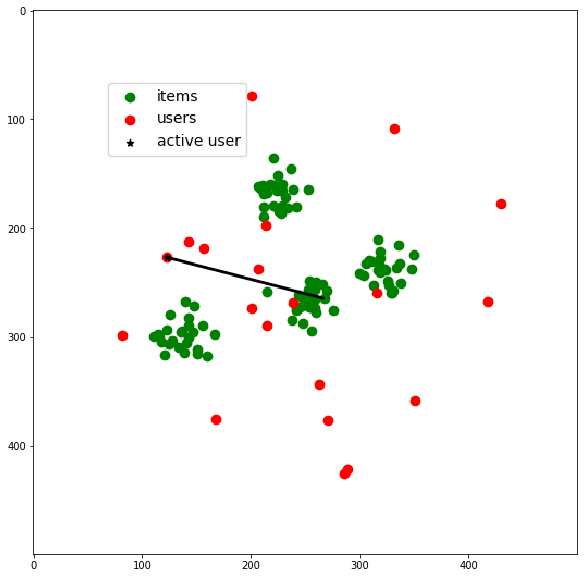

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(img)

In [10]:
#record sessions
from tqdm import tqdm_notebook

import gym.wrappers
env = gym.make("prim-gym-v1")
env.init_gym(env_1_args)
env = gym.wrappers.Monitor(env,directory="videos",force=True)

env.reset()
for i in tqdm_notebook(range(1000)):
    action = np.random.choice(env.unwrapped._n_actions)
    observation, reward, done, info = env.step(action)
env.close()


(100, 2)


In [11]:
!ls ./videos/

openaigym.episode_batch.0.5144.stats.json
openaigym.manifest.0.5144.manifest.json
openaigym.video.0.5144.video000000.meta.json
openaigym.video.0.5144.video000000.mp4


In [12]:
#show video
from IPython.display import HTML
import os

video_names = list(filter(lambda s:s.endswith(".mp4"),os.listdir("./videos/")))

HTML("""
<video width="640" height="480" controls>
  <source src="{}" type="video/mp4">
</video>
""".format("./videos/"+video_names[-1]))

# Lines are last 5 recommendations  
# reward :yellow - 1, black - 0 